# Employee Attrition Prediction Project

In [1]:
In this project we are going to predict which employees in a company are more willing to leave or basically tending to leave the corporation.

### Problem Statement:

In [2]:
* Datascientist -> HR team provided you the past data about employees who left and stayed. 

* You work as a data scientist at this multinational corporation and the HR team has collected some
data for you on their employees.

* They will be asking you to predict which employees are more likely to quit.


So the HR team collected information about:

1.Job Involvement - Are they involved in their jobs or not 

2.About their Education - Do they have a bachelor's degree or master's degree or PHD for example.

3.Job Satisfaction - Are they satisfied with their work life. 

4.Relationship Satisfaction with their team and with their manager as well. 

5.and their Work Life Balance as well.

there are almost 35 factors/features the HR team actually provided us to predict the employee retention.

### Facts about Employee Hiring:

In [3]:
1.Small business owners spend 40 percent of their working hours on tasks that do not generate any income
such as hiring.

2.Another point is companies spend between 15 percent to 20 percent of the employee's salary to recruit
a new candidate.

3.An average company loses an anywhere between 1 percent and 2.5 percent of their total revenue 
on the time it takes to bring in a new hire up to speed.

So the problem does not stop by actually hiring the right people.

The problem is in actually training them because you know even if you have a skilled employee for them
to actually like you know like understand the systems understand the processes you know get up to speed
with their team and so on.

4.Hiring a new employee costs an average of around 76 hundred dollars.

If you have a corporation between zero and five hundred employees which is again a lot of money per

5.Employee and it takes 52 days on average to fill a position just imagine again.
That is almost two months which is a lot of time.

### Steps Involved in this Project:

In [4]:
1. Importing the Libraries
2. Importing the Dataset
3. Handling missing values
4. Encoding Categorical data into Numerical data
5. Exploratory Data Analysis
6. Feature Importance -> Heatmap, using ExtraTreeRegressor
7. Splitting into train and test
8. Applying various ML and DL models.
9. Hyperparameter Tuning
10. Performance Metrics like confusion Matrix and Classification Report

### Importing the Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the Dataset

In [6]:
emp_df = pd.read_csv('Human_Resources.csv')

In [7]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
emp_df.shape

(1470, 35)

In [9]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [10]:
# out of 6 employees 1 employee is leaving the company

In [11]:
emp_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [12]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [13]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
emp_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [15]:
emp_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Value_Counts

In [16]:
for col in list(emp_df):
    print(col)
    print(emp_df[col].unique())

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496

In [17]:
for col in list(emp_df):
    print(col, emp_df[col].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


### Missing Values

In [18]:
emp_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

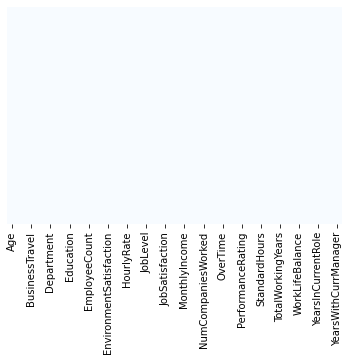

In [19]:
sns.heatmap(emp_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

### Exploratory Data Analysis

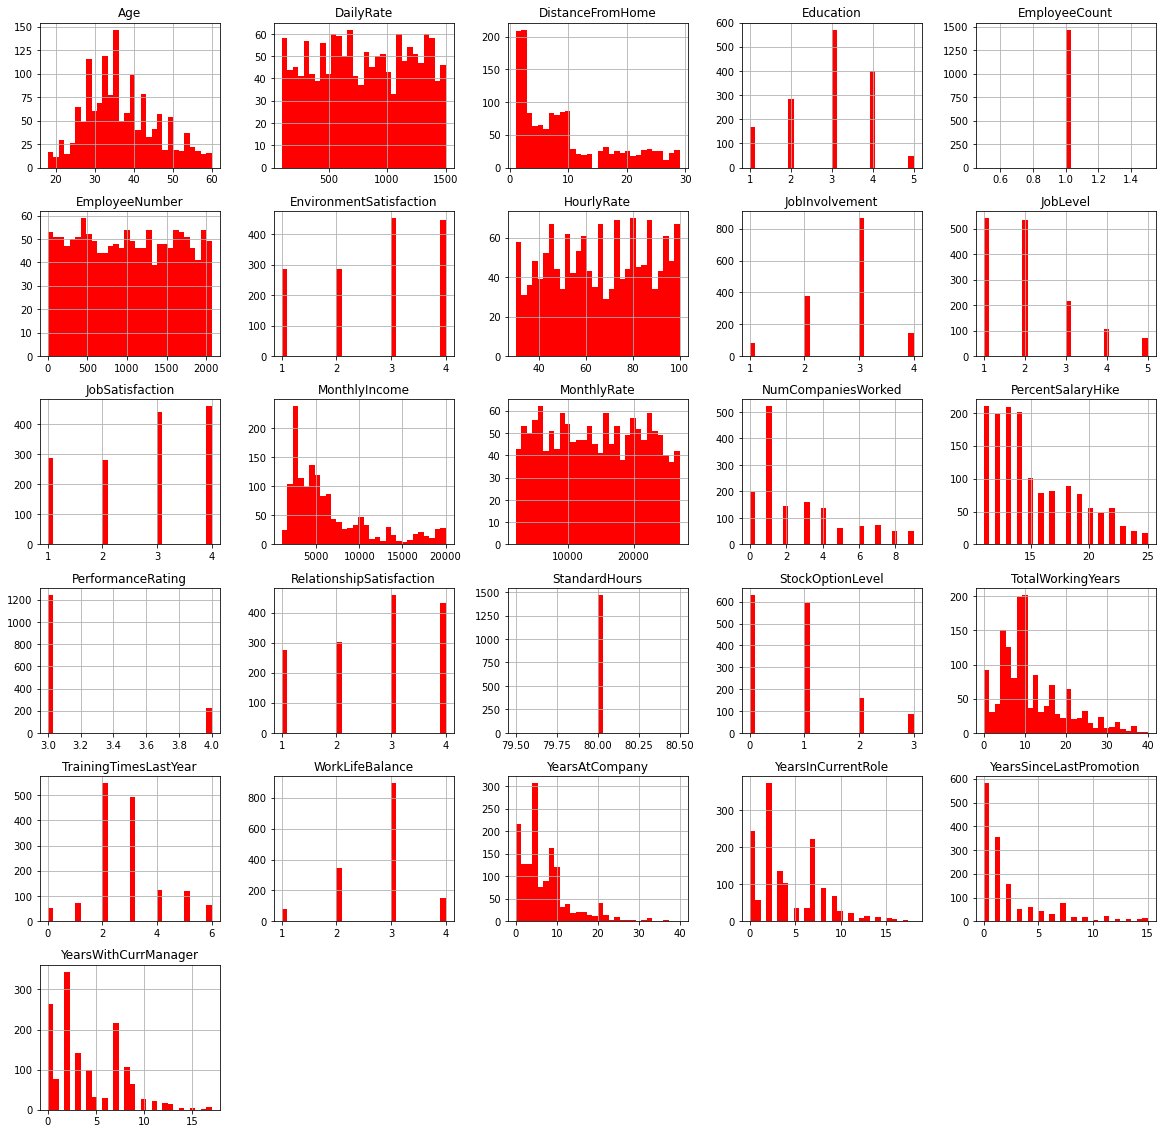

In [20]:
emp_df.hist(figsize=(20,20), color='r', bins=30)
plt.show()

### Dropping Unwanted Columns

In [21]:
emp_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [22]:
emp_df.shape

(1470, 31)

In [23]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [24]:
left_df = emp_df[emp_df['Attrition'] == 'Yes']
stayed_df = emp_df[emp_df['Attrition'] == 'No']

In [25]:
print('Total = ', len(emp_df))

print('Number of employees who left the company= ',len(left_df))
print('Percentage of employees who left the company= ',
      1.*len(left_df)/len(emp_df)*100.0, '%')

print('Number of employees who stayed in the company= ',len(stayed_df))
print('Percentage of employees who stayed in the company= ',
      1.*len(stayed_df)/len(emp_df)*100.0, '%')

Total =  1470
Number of employees who left the company=  237
Percentage of employees who left the company=  16.122448979591837 %
Number of employees who stayed in the company=  1233
Percentage of employees who stayed in the company=  83.87755102040816 %


In [26]:
left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [27]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,4818.208001,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,3211.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,5204.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8834.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


### Count Plot on Employee Attrition 

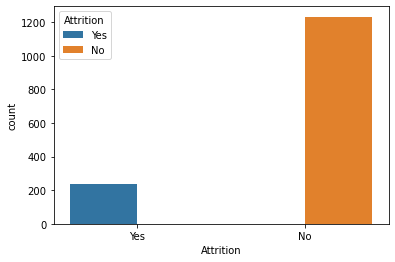

In [28]:
sns.countplot(x = 'Attrition',data=emp_df, hue='Attrition')
plt.show()

Observation: It's an unbalanced dataset as we can clearly seee there are a lot of No's.

### Pie Chart

In [29]:
x = emp_df.Attrition.value_counts()
colors = ['red', 'green']

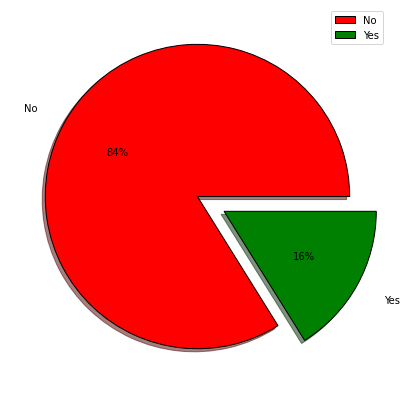

In [30]:
plt.figure(figsize=(7,7))
plt.pie(x, labels=x.index, colors=colors, wedgeprops={'edgecolor':'black'},
       autopct = '%1.0f%%',
       explode = [0, 0.2],
       labeldistance = 1.2,
       shadow = True)
plt.legend()
plt.show()

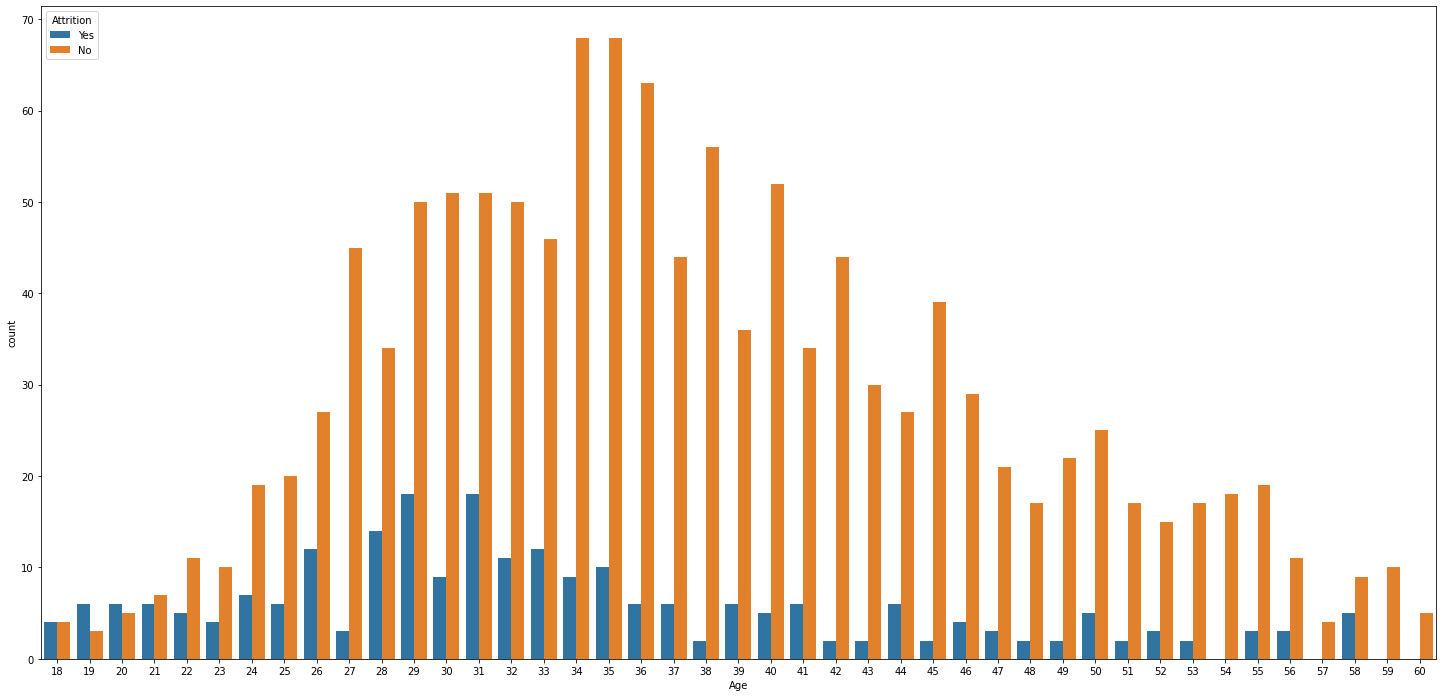

In [31]:
plt.figure(figsize=(25,12))
sns.countplot(x='Age', hue='Attrition', data=emp_df)
plt.show()

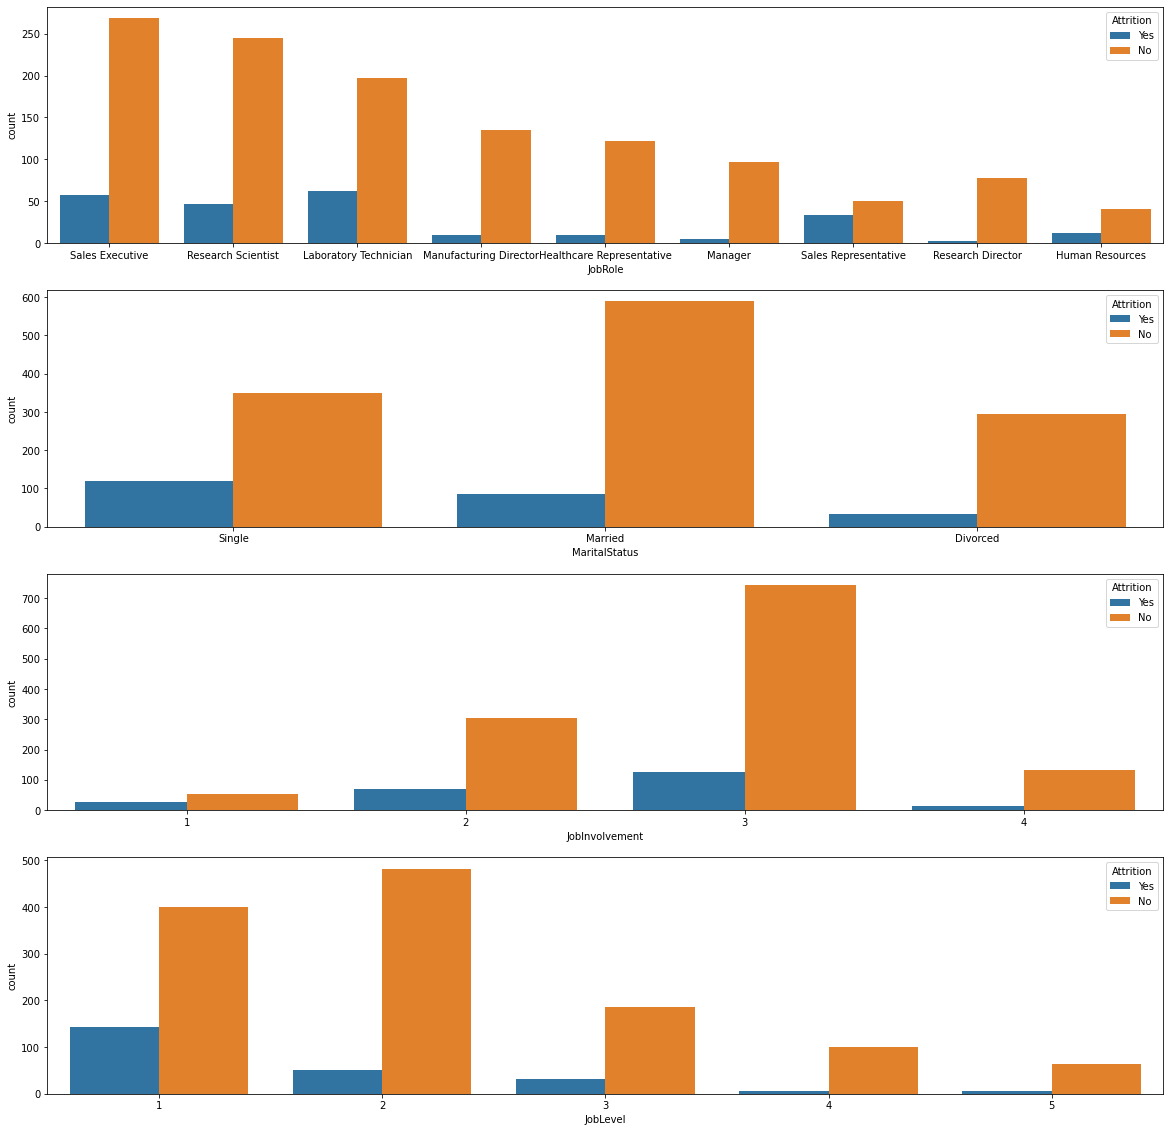

In [32]:
plt.figure(figsize=(20,20))
plt.subplot(411)
sns.countplot(x='JobRole', hue='Attrition', data=emp_df)
plt.subplot(412)
sns.countplot(x='MaritalStatus', hue='Attrition', data=emp_df)
plt.subplot(413)
sns.countplot(x='JobInvolvement', hue='Attrition', data=emp_df)
plt.subplot(414)
sns.countplot(x='JobLevel', hue='Attrition', data=emp_df)
plt.show()

In [33]:
emp_df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

### KDE Plot

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

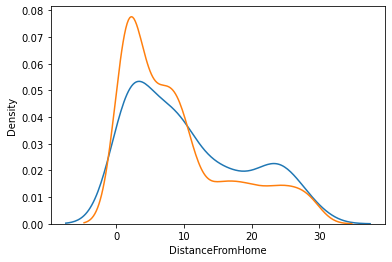

In [34]:
sns.kdeplot(left_df['DistanceFromHome'], label='Employee Who Left')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employee Who Stayed')

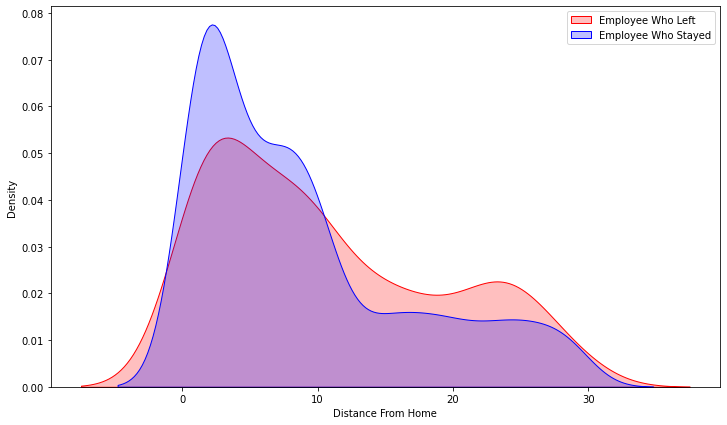

In [35]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label='Employee Who Left', 
           shade=True, color='r')
sns.kdeplot(stayed_df['DistanceFromHome'], label='Employee Who Stayed',
           shade=True, color='b')

plt.xlabel('Distance From Home')
plt.legend()
plt.show()

In [36]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

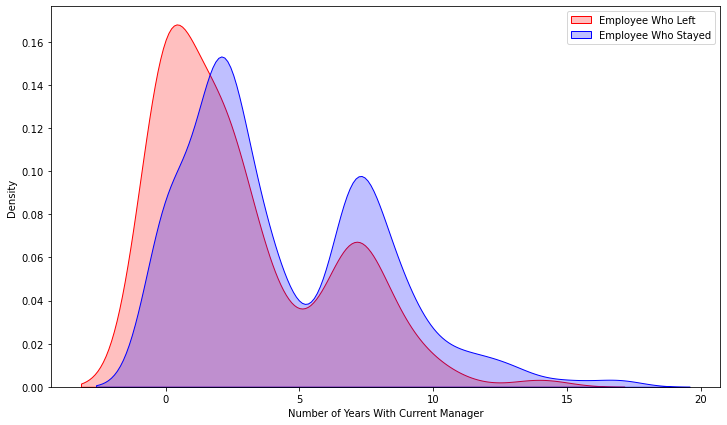

In [37]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label='Employee Who Left', 
           shade=True, color='r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label='Employee Who Stayed',
           shade=True, color='b')

plt.xlabel('Number of Years With Current Manager')
plt.legend()
plt.show()

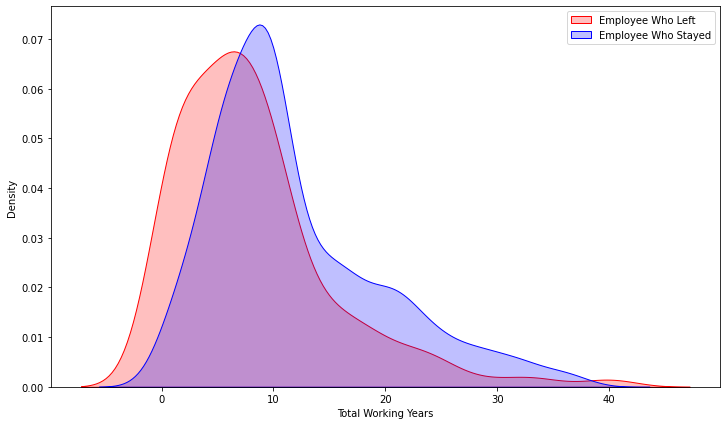

In [38]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], label='Employee Who Left', 
           shade=True, color='r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label='Employee Who Stayed',
           shade=True, color='b')

plt.xlabel('Total Working Years')
plt.legend()
plt.show()

### Box Plot

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Gender'>

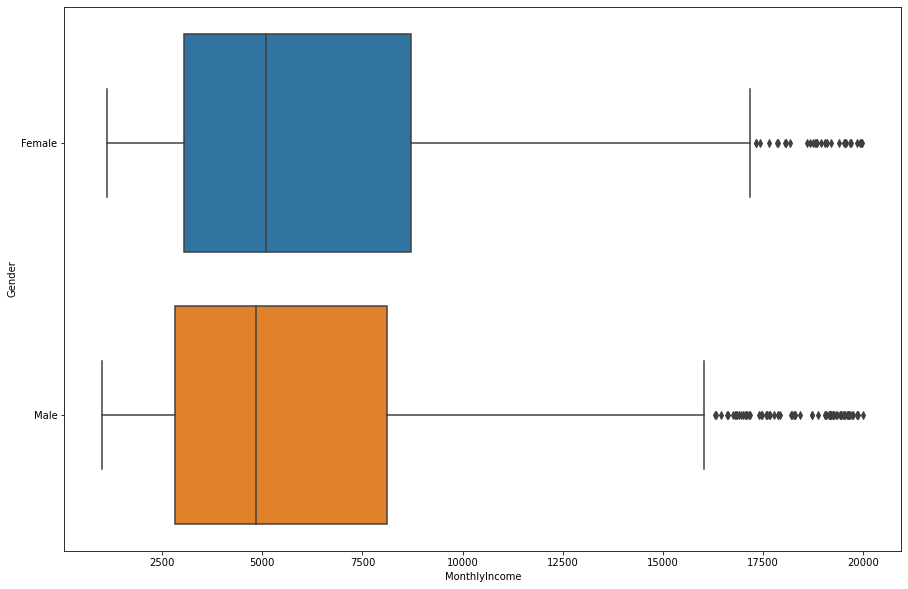

In [39]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='Gender', data=emp_df)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

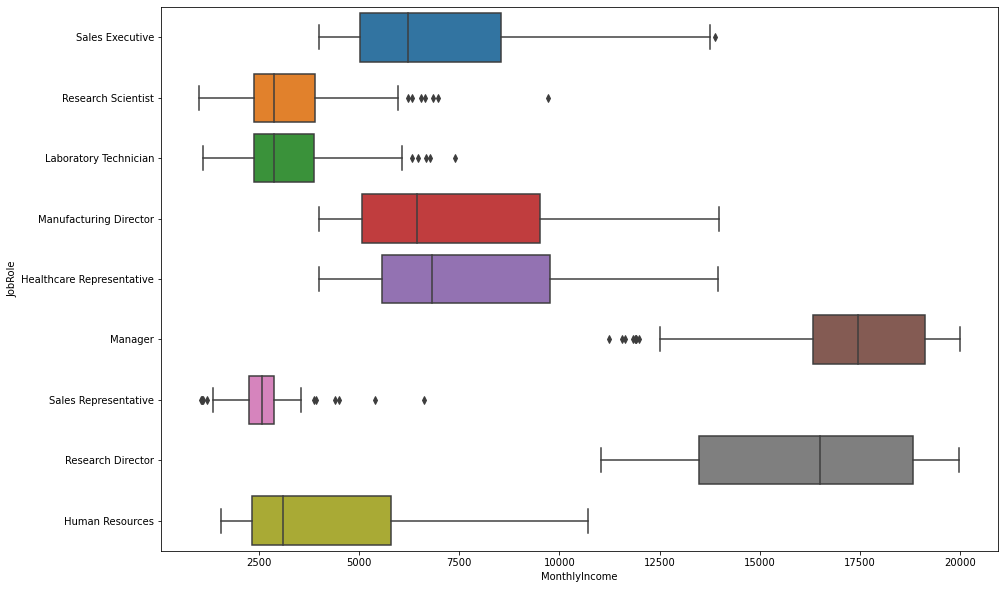

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=emp_df)

### Encoding - Coverting Categorical data into Numerical

In [41]:
emp_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [42]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [43]:
emp_df.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [44]:
emp_df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [45]:
emp_df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [46]:
emp_df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [47]:
emp_df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [48]:
emp_df.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

### pd.get_dummies on Nominal data

In [49]:
cat = emp_df[['BusinessTravel', 'Department', 'EducationField', 
              'JobRole', 'MaritalStatus']]

In [50]:
cat = pd.get_dummies(cat, drop_first=True)

In [51]:
cat.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


### Label Encoding on Ordinal data

In [52]:
emp_df.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [53]:
emp_df.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [54]:
emp_df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

emp_df['Gender'] = le.fit_transform(emp_df['Gender'])
emp_df['OverTime'] = le.fit_transform(emp_df['OverTime'])
emp_df['Attrition'] = le.fit_transform(emp_df['Attrition'])

In [56]:
emp_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [57]:
numerical = emp_df[['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'HourlyRate', 'Gender','JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [58]:
numerical

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,0,3,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,1,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,1,2,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,0,3,1,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,1,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,1,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,613,6,1,4,42,1,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,155,4,3,2,87,1,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1023,2,3,4,63,1,2,2,...,3,4,0,17,3,2,9,6,0,8


In [59]:
emp_df = pd.concat([cat, numerical], axis=1)

In [60]:
emp_df.dtypes

BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
EducationField_Life Sciences         uint8
EducationField_Marketing             uint8
EducationField_Medical               uint8
EducationField_Other                 uint8
EducationField_Technical Degree      uint8
JobRole_Human Resources              uint8
JobRole_Laboratory Technician        uint8
JobRole_Manager                      uint8
JobRole_Manufacturing Director       uint8
JobRole_Research Director            uint8
JobRole_Research Scientist           uint8
JobRole_Sales Executive              uint8
JobRole_Sales Representative         uint8
MaritalStatus_Married                uint8
MaritalStatus_Single                 uint8
Age                                  int64
Attrition                            int32
DailyRate                            int64
DistanceFromHome                     int64
Education  

In [61]:
emp_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,0,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,0,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,0,...,3,4,1,6,3,3,2,2,2,2


### Dividing dataset based on Independent and Dependent Columns

In [62]:
x = emp_df.drop('Attrition', axis=1)
y = emp_df['Attrition']

In [63]:
x.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,0,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,0,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,0,...,3,4,1,6,3,3,2,2,2,2


In [64]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

### Feature Importance

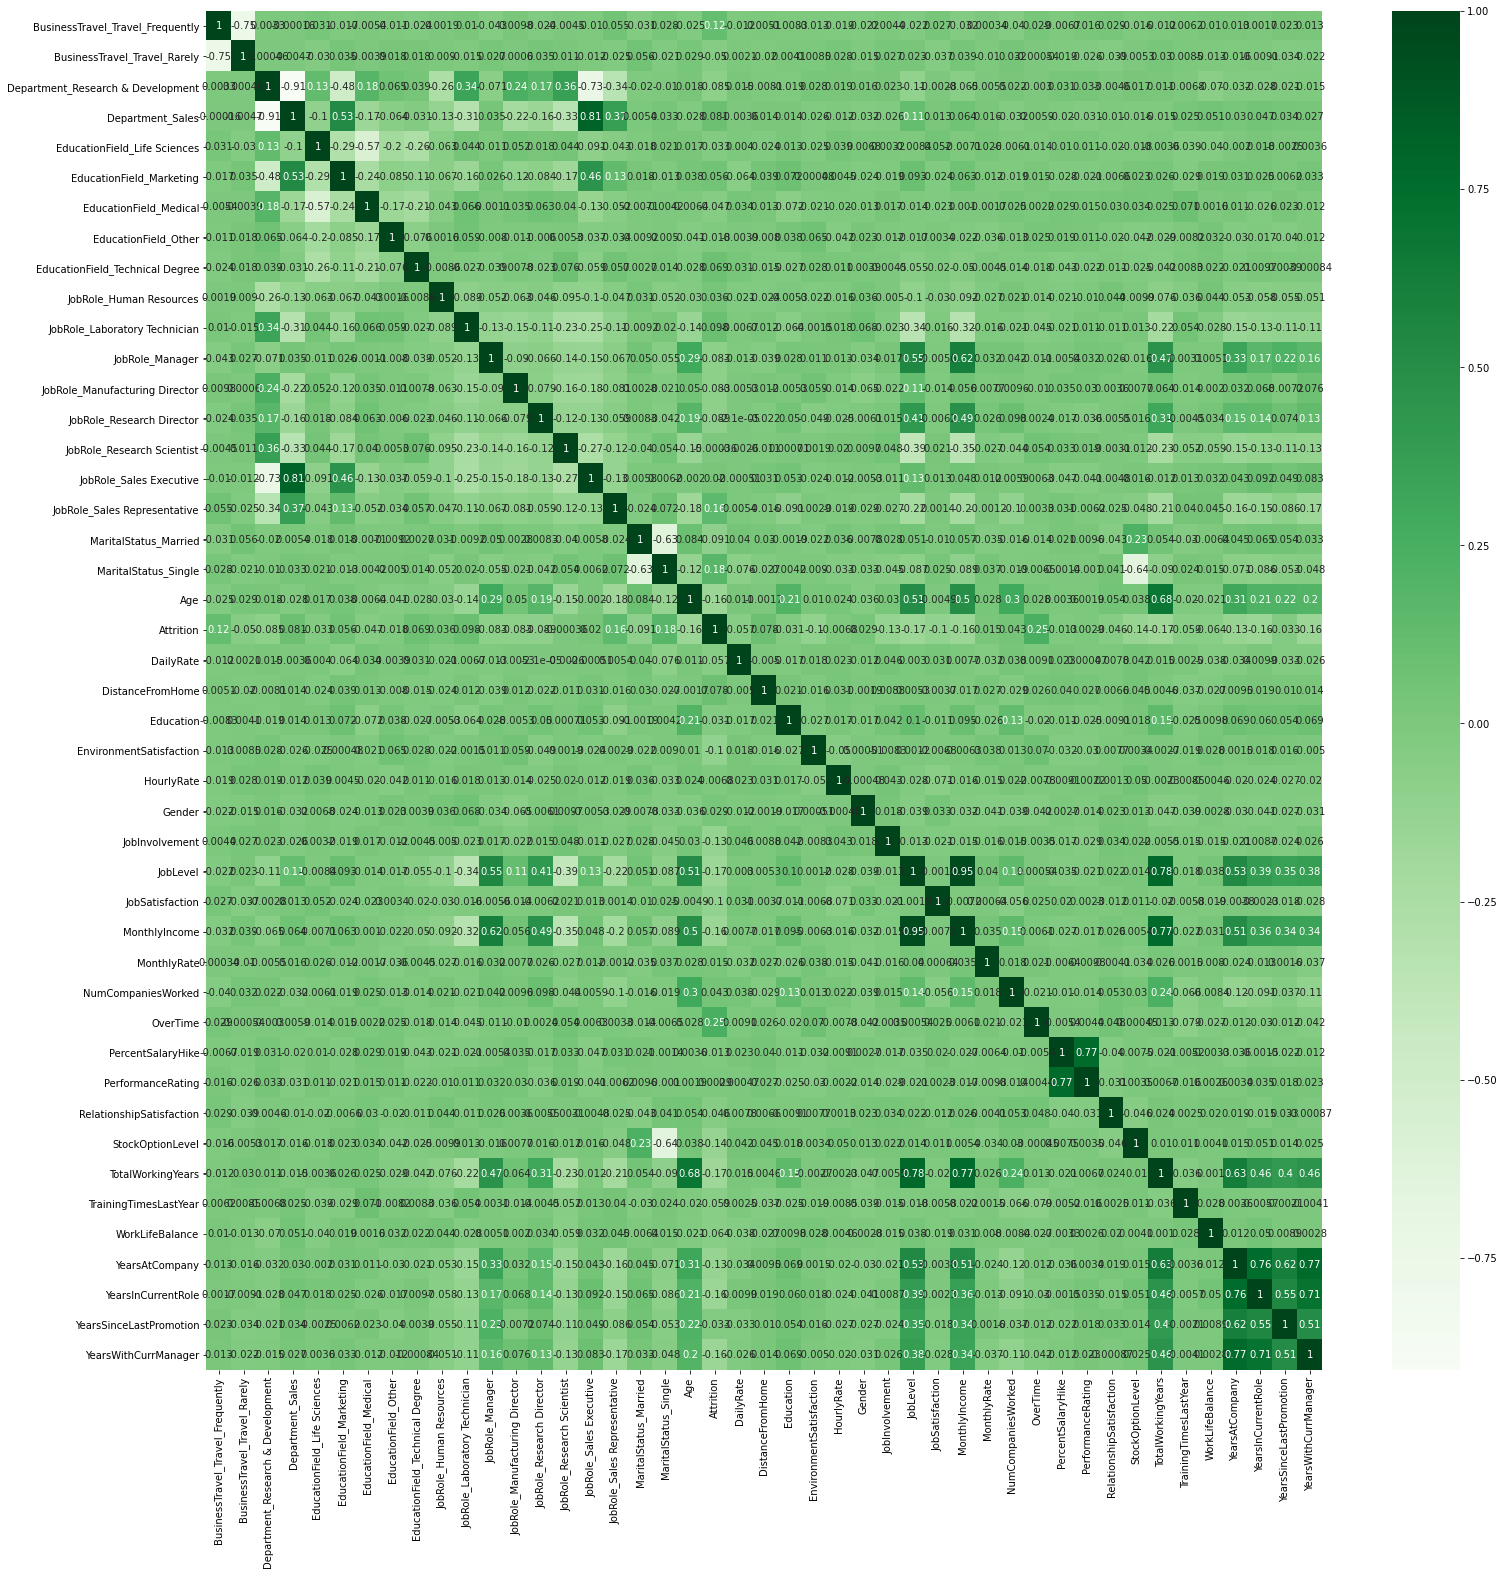

In [65]:
plt.figure(figsize=(25,25))
sns.heatmap(emp_df.corr(), cmap='Greens', annot=True)
plt.show()

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
m = ExtraTreesRegressor()
m.fit(x,y)

ExtraTreesRegressor()

In [67]:
m.feature_importances_

array([0.02360004, 0.00958666, 0.00642352, 0.00623857, 0.00941153,
       0.0119389 , 0.0149616 , 0.00822281, 0.0162001 , 0.00690876,
       0.01742539, 0.00284246, 0.01455071, 0.00124809, 0.01680602,
       0.01684881, 0.00920019, 0.0110365 , 0.03881909, 0.04005415,
       0.02830331, 0.03505837, 0.02151729, 0.03716851, 0.020688  ,
       0.01967018, 0.03311869, 0.0431226 , 0.03750151, 0.03552413,
       0.02238447, 0.02745826, 0.06057407, 0.02222662, 0.00986578,
       0.03516145, 0.02541673, 0.03147879, 0.02398175, 0.04065342,
       0.02674161, 0.02425299, 0.02653944, 0.02926812])

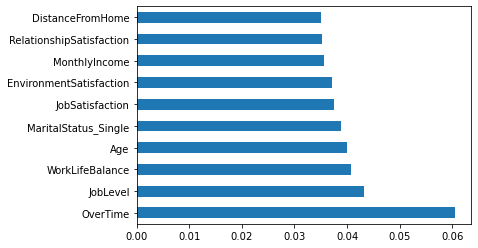

In [68]:
feat_imp = pd.Series(m.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### Splitting the dataset

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=99)

In [70]:
x_train.shape

(1102, 44)

In [71]:
x_test.shape

(368, 44)

### Feature Scaling

In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [73]:
x_train

array([[0.        , 1.        , 1.        , ..., 0.05555556, 0.        ,
        0.11764706],
       [0.        , 1.        , 1.        , ..., 0.33333333, 0.06666667,
        0.41176471],
       [1.        , 0.        , 1.        , ..., 0.11111111, 0.06666667,
        0.11764706],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.44444444, 0.33333333,
        0.17647059]])

In [74]:
x_test

array([[0.        , 1.        , 0.        , ..., 0.44444444, 0.33333333,
        0.47058824],
       [0.        , 1.        , 1.        , ..., 0.11111111, 0.        ,
        0.11764706],
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.        ],
       [0.        , 1.        , 1.        , ..., 0.11111111, 0.        ,
        0.11764706],
       [0.        , 1.        , 0.        , ..., 0.22222222, 0.06666667,
        0.23529412]])

### Applying ML models on the dataset

### Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred = model.predict(x_test)

In [77]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [79]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 88.04347826086956 %


[[300  35]
 [  9  24]]


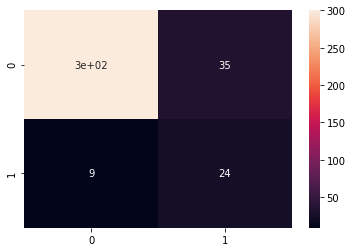

In [80]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [81]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       335
           1       0.41      0.73      0.52        33

    accuracy                           0.88       368
   macro avg       0.69      0.81      0.73       368
weighted avg       0.92      0.88      0.89       368



### Random Forrest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [83]:
y_pred = model.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [86]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 86.95652173913044 %


[[308  47]
 [  1  12]]


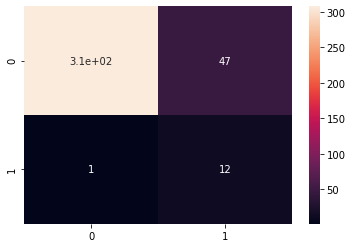

In [87]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [88]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       355
           1       0.20      0.92      0.33        13

    accuracy                           0.87       368
   macro avg       0.60      0.90      0.63       368
weighted avg       0.97      0.87      0.91       368



### Random Forest using Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [90]:
parameters = {'n_estimators':[10, 100, 150, 200, 500]}
rf = RandomForestClassifier()
gv = GridSearchCV(rf, parameters, cv=5, scoring='accuracy')
gv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 100, 150, 200, 500]},
             scoring='accuracy')

In [91]:
gv.best_params_

{'n_estimators': 500}

In [92]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [93]:
y_pred = model.predict(x_test)

In [94]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [95]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [96]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 87.22826086956522 %


[[309  47]
 [  0  12]]


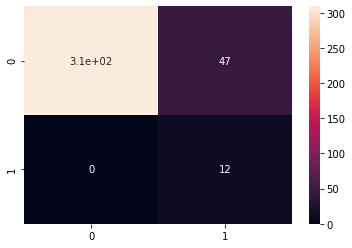

In [97]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [98]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       356
           1       0.20      1.00      0.34        12

    accuracy                           0.87       368
   macro avg       0.60      0.93      0.63       368
weighted avg       0.97      0.87      0.91       368



### KNN Classifier

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [100]:
y_pred = knn.predict(x_test)

In [101]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [102]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [103]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 85.86956521739131 %


[[304  47]
 [  5  12]]


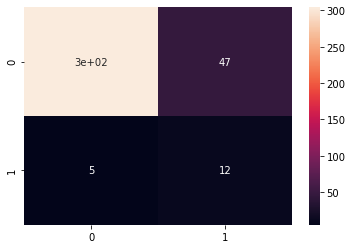

In [104]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [105]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       351
           1       0.20      0.71      0.32        17

    accuracy                           0.86       368
   macro avg       0.59      0.79      0.62       368
weighted avg       0.95      0.86      0.89       368



### SVM

In [106]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train, y_train)

SVC()

In [107]:
y_pred = sv.predict(x_test)

In [108]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [110]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 86.68478260869566 %


[[306  46]
 [  3  13]]


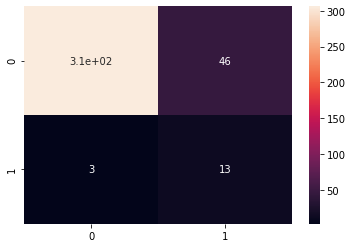

In [111]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [112]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       352
           1       0.22      0.81      0.35        16

    accuracy                           0.87       368
   macro avg       0.61      0.84      0.64       368
weighted avg       0.96      0.87      0.90       368



### SVM using Hyperparameter Tuning

In [113]:
svc = SVC()
parameters = {'kernel':['linear', 'poly', 'rbf'], 
               'C':[0.001,0.01,0.1,1,10], 'degree':[1,2,3,4,5,6,7], 
                'gamma':[0.001, 0.1, 1, 2, 5, 10, 100]}
gv = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')
gv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'degree': [1, 2, 3, 4, 5, 6, 7],
                         'gamma': [0.001, 0.1, 1, 2, 5, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [114]:
gv.best_params_

{'C': 0.01, 'degree': 1, 'gamma': 100, 'kernel': 'poly'}

In [116]:
svc = SVC(C=0.01, degree=1, gamma=100, kernel='poly')
svc.fit(x_train, y_train)

SVC(C=0.01, degree=1, gamma=100, kernel='poly')

In [117]:
y_pred = svc.predict(x_test)

In [118]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [120]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 88.04347826086956 %


[[300  35]
 [  9  24]]


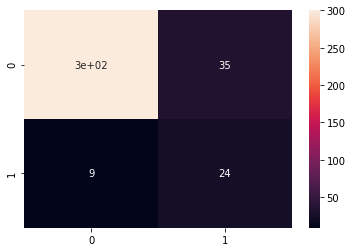

In [121]:
cm = confusion_matrix(y_pred, y_test)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [122]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       335
           1       0.41      0.73      0.52        33

    accuracy                           0.88       368
   macro avg       0.69      0.81      0.73       368
weighted avg       0.92      0.88      0.89       368

